# Klasyfikacja danych przy użyciu algorytmów uczenia maszynowego (różne zbiory danych)

In [18]:
# Wczytanie zbioru danych
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import kagglehub
from kagglehub import KaggleDatasetAdapter
import seaborn as sns
import pandas as pd
import numpy as np


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

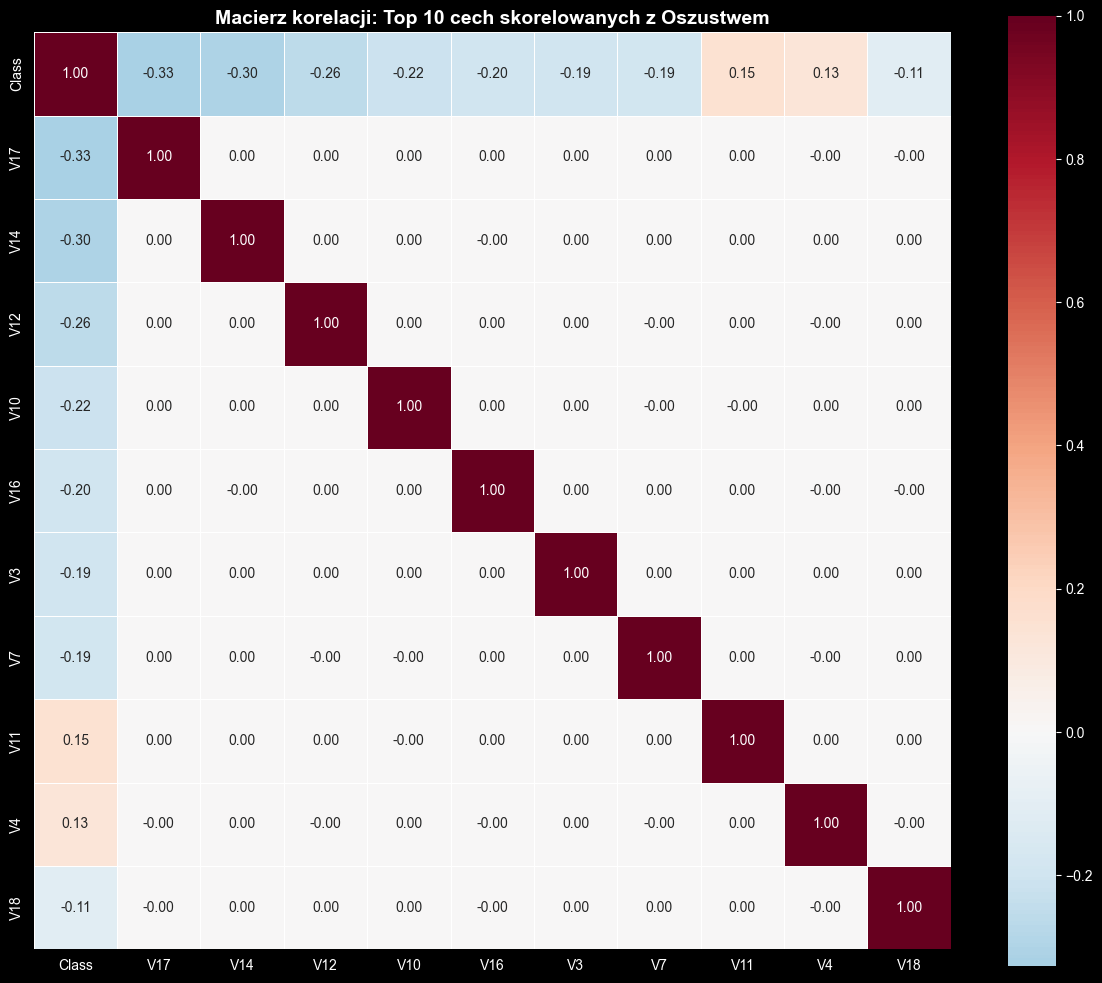

In [6]:
# Wczytanie zbioru MNIST
data_set_path = "creditcard.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    data_set_path
)
print(df.head())
print(df.info())

missing_values = df.isnull().sum()
print(missing_values)
duplicates = df.duplicated().sum()
print(f"   Liczba zduplikowanych wierszy: {duplicates}")

#Rozkład klas
class_distribution = df['Class'].value_counts().sort_index()
class_percentages = df['Class'].value_counts(normalize=True).sort_index() * 100
print(f"   Klasa 0 (Normalna transakcja):  {class_distribution[0]:,} ({class_percentages[0]:.2f}%)")
print(f"   Klasa 1 (Oszustwo):             {class_distribution[1]:,} ({class_percentages[1]:.2f}%)")

#Korelacje
correlations = df.corr()['Class'].sort_values(ascending=False)
top_features = correlations.abs().sort_values(ascending=False).head(11).index
df_top_corr = df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(df_top_corr, annot=True, cmap='RdBu_r', center=0, fmt='.2f', square=True, linewidths=0.5)
plt.title('Macierz korelacji: Top 10 cech skorelowanych z Oszustwem', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Przygotowanie danych
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Normalizacja danych
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


--- Regrasja logistyczna---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.58      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



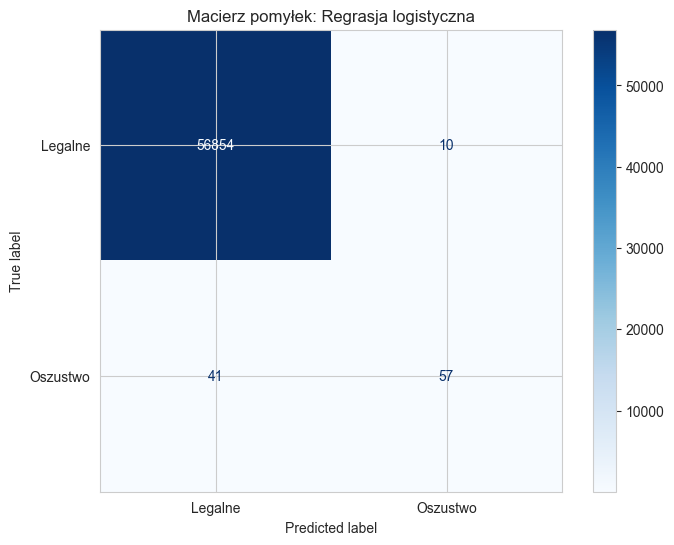

In [99]:
# Trenowanie klasyfikatorow
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print(f"\n--- Regrasja logistyczna---")
print(classification_report(y_test, y_pred_lr))

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legalne', 'Oszustwo'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f"Macierz pomyłek: Regrasja logistyczna")
plt.show()


--- SVM---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



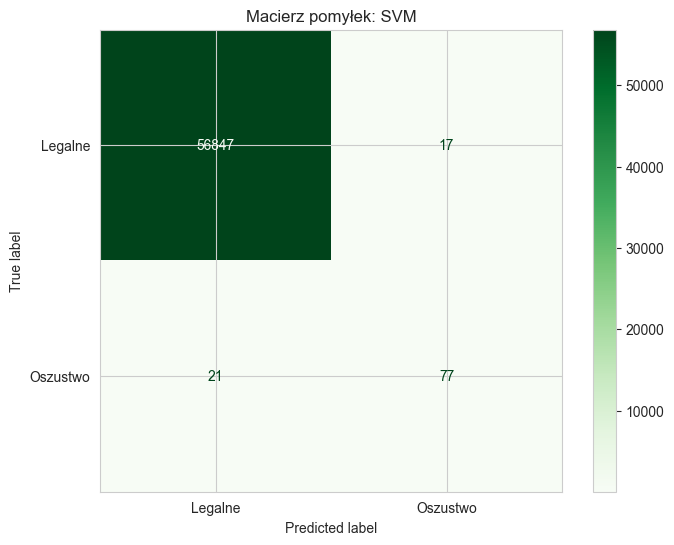

In [100]:
svm = SVC(kernel='linear', C=0.5)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(f"\n--- SVM---")
print(classification_report(y_test, y_pred_svm))

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legalne', 'Oszustwo'])
disp.plot(ax=ax, cmap='Greens', values_format='d')
ax.set_title("Macierz pomyłek: SVM")
plt.show()


--- KNN---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



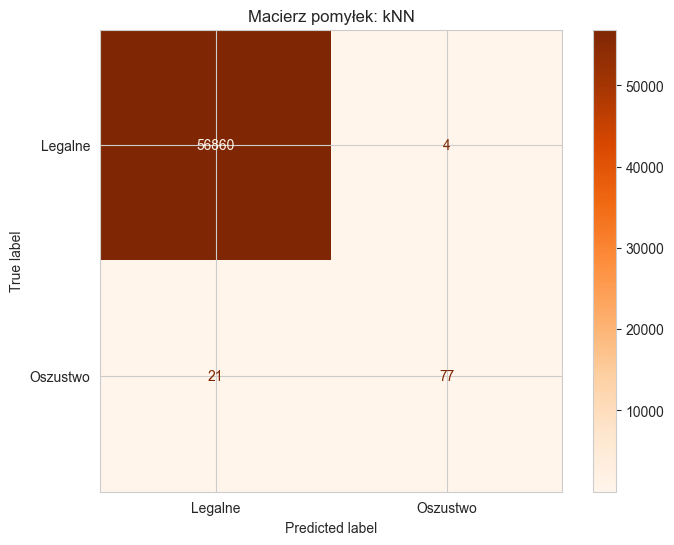

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"\n--- KNN---")
print(classification_report(y_test, y_pred_knn))

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legalne', 'Oszustwo'])
disp.plot(ax=ax, cmap='Oranges', values_format='d')
ax.set_title("Macierz pomyłek: kNN")
plt.show()


--- Drzewo decyzyjne---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



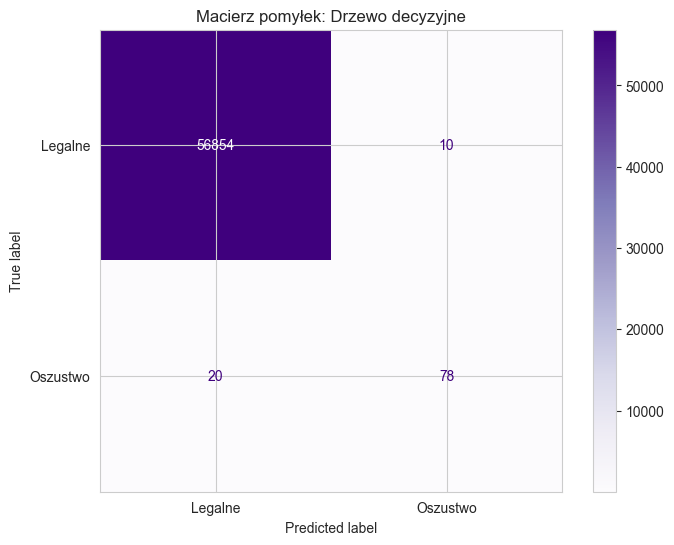

In [102]:
dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_dt = dec_tree.predict(X_test)

print(f"\n--- Drzewo decyzyjne---")
print(classification_report(y_test, y_pred_dt))

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legalne', 'Oszustwo'])
disp.plot(ax=ax, cmap='Purples', values_format='d')
ax.set_title("Macierz pomyłek: Drzewo decyzyjne")
plt.show()


--- Random Forest---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



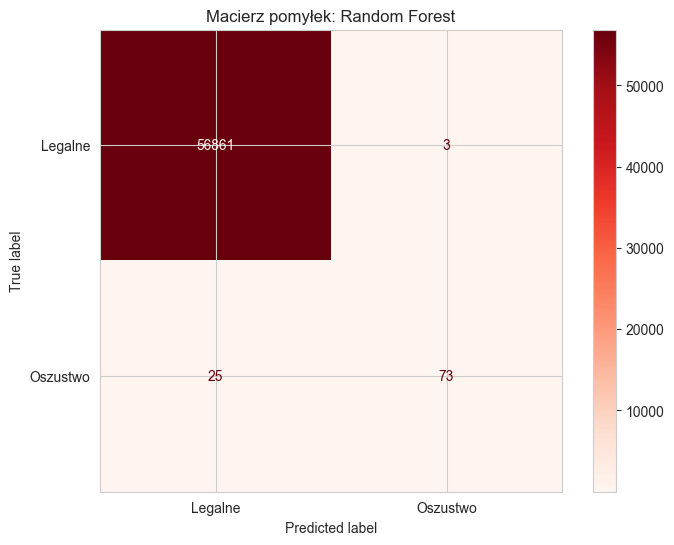

In [103]:
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rand_forest.fit(X_train, y_train)
y_pred_rf = rand_forest.predict(X_test)

print(f"\n--- Random Forest---")
print(classification_report(y_test, y_pred_rf))

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legalne', 'Oszustwo'])
disp.plot(ax=ax, cmap='Reds', values_format='d')
ax.set_title("Macierz pomyłek: Random Forest")
plt.show()

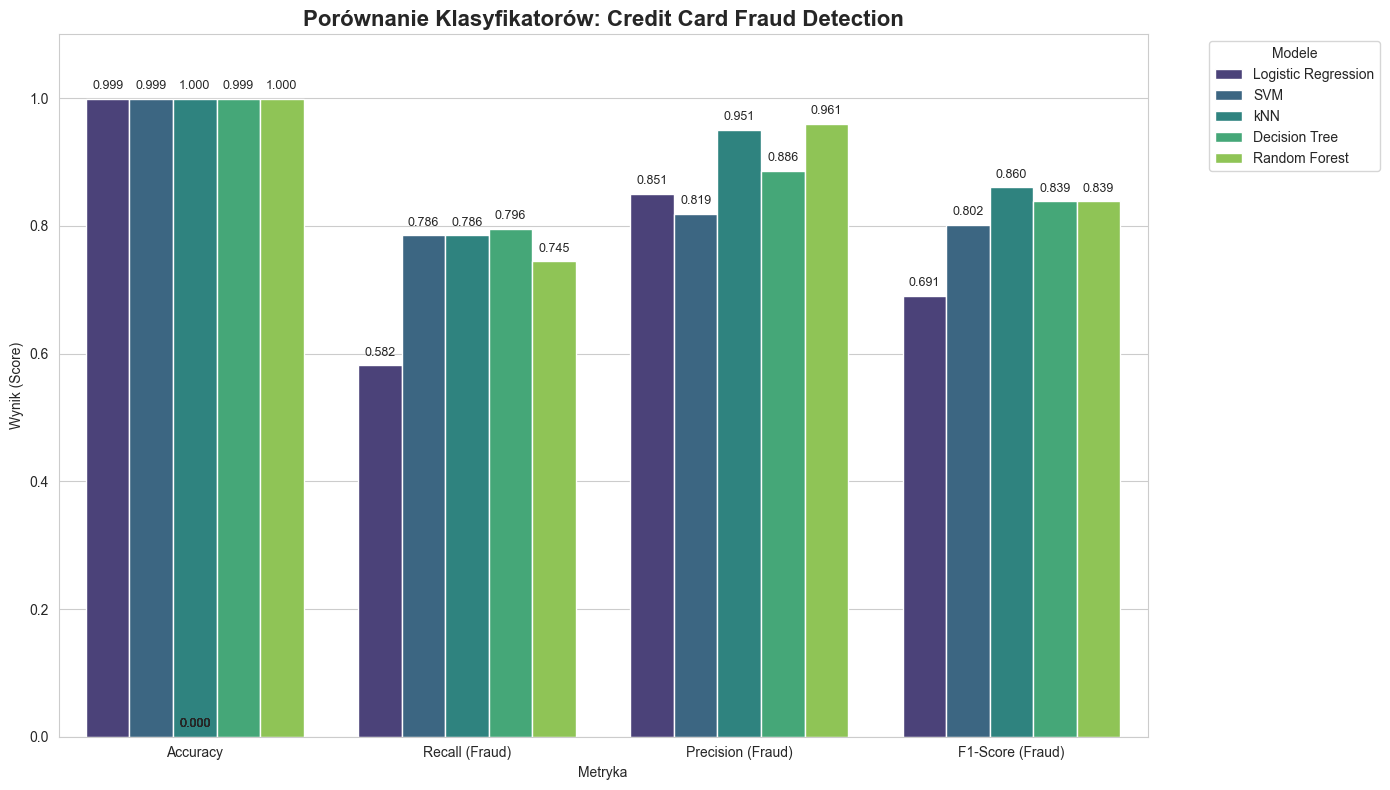

In [104]:
preds = {
    'Logistic Regression': y_pred_lr,
    'SVM': y_pred_svm,
    'kNN': y_pred_knn,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

results_list = []
for name, y_pred in preds.items():
    report = classification_report(y_test, y_pred, output_dict=True)

    results_list.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Recall (Fraud)': report['1']['recall'],
        'Precision (Fraud)': report['1']['precision'],
        'F1-Score (Fraud)': report['1']['f1-score']
    })

df_results = pd.DataFrame(results_list)
df_plot = df_results.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x='Metric', y='Value', hue='Model', data=df_plot, palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=9)

plt.title('Porównanie Klasyfikatorów: Credit Card Fraud Detection', fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.ylabel('Wynik (Score)')
plt.xlabel('Metryka')
plt.legend(title='Modele', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.style.use('dark_background')
plt.tight_layout()
plt.show()

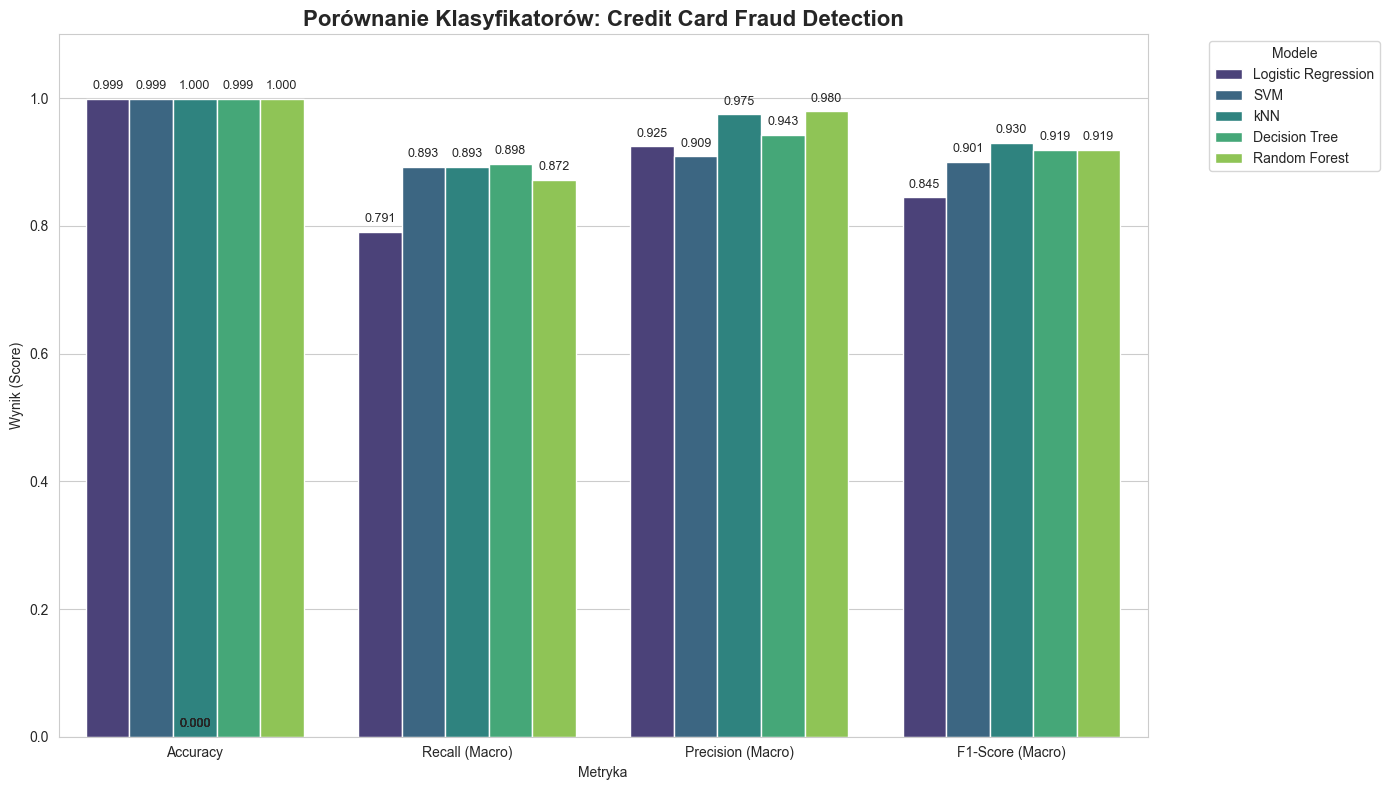

In [105]:
preds = {
    'Logistic Regression': y_pred_lr,
    'SVM': y_pred_svm,
    'kNN': y_pred_knn,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

results_list = []
for name, y_pred in preds.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    results_list.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Recall (Macro)': report['macro avg']['recall'],
        'Precision (Macro)': report['macro avg']['precision'],
        'F1-Score (Macro)': report['macro avg']['f1-score']
    })

df_results = pd.DataFrame(results_list)
df_plot = df_results.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
ax = sns.barplot(x='Metric', y='Value', hue='Model', data=df_plot, palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=9)

plt.title('Porównanie Klasyfikatorów: Credit Card Fraud Detection', fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.ylabel('Wynik (Score)')
plt.xlabel('Metryka')
plt.legend(title='Modele', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
#plt.style.use('dark_background')
plt.show()

In [106]:
# Predykcja i ocena wynikow
print("Logistic Regresion")
print("-" *100)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

print("SVM")
print("-"*100)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

print("kNN")
print("-"*100)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


Logistic Regresion
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.58      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962

SVM
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.79      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962

kNN
----------------------------------------------------------------------------------------------------
              pr

In [23]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
#grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='recall', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print(f"Najlepsze parametry kNN: {grid_knn.best_params_}")
print(f"Najlepszy wynik recall: {grid_knn.best_score_:.4f}")

Najlepsze parametry kNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Najlepszy wynik recall: 0.2081


In [24]:
final_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='distance')
final_knn.fit(X_train, y_train)

y_pred_final = final_knn.predict(X_test)

print("--- OSTATECZNE WYNIKI ZOPTYMALIZOWANEGO kNN ---")
print(classification_report(y_test, y_pred_final))

--- OSTATECZNE WYNIKI ZOPTYMALIZOWANEGO kNN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.21      0.35        98

    accuracy                           1.00     56962
   macro avg       1.00      0.61      0.68     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"Najlepsze parametry Random Forest: {grid_rf.best_params_}")
print(f"Najlepszy wynik F1: {grid_rf.best_score_:.4f}")

Najlepsze parametry Random Forest: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Najlepszy wynik F1: 0.8343


In [26]:
final_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=20, min_samples_split=2, random_state=42, n_jobs=-1)
final_rf.fit(X_train, y_train)

y_pred_final_rf = final_rf.predict(X_test)

print("--- OSTATECZNE WYNIKI ZOPTYMALIZOWANEGO kNN ---")
print(classification_report(y_test, y_pred_final_rf))

--- OSTATECZNE WYNIKI ZOPTYMALIZOWANEGO kNN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



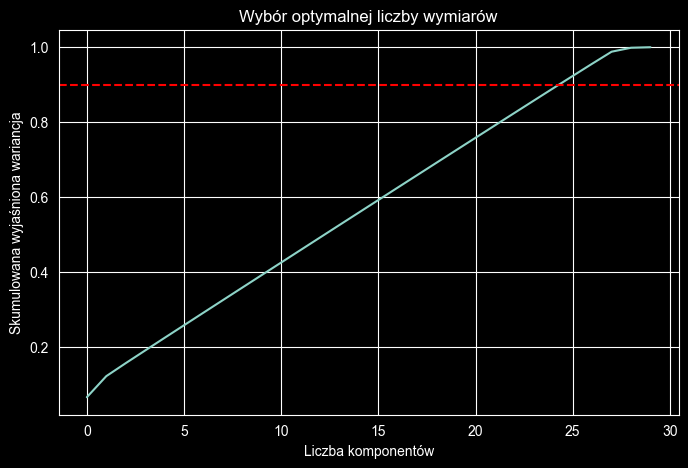

np.float64(0.12251521612732882)

In [12]:
# Redukcja wymiarowosci
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# pca.explained_variance_ratio_.sum()

pca_scaler = StandardScaler()
X_train_scaled = pca_scaler.fit_transform(X_train)
X_test_scaled = pca_scaler.transform(X_test)

pca_full = PCA().fit(X_train_scaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Liczba komponentów')
plt.ylabel('Skumulowana wyjaśniona wariancja')
plt.axhline(y=0.90, color='r', linestyle='--') # Linia 90% wariancji
plt.title('Wybór optymalnej liczby wymiarów')
plt.grid(True)
plt.show()


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca.explained_variance_ratio_.sum()


In [9]:
#X_pcaTrain, X_pcaTest, y_ptrain, y_ptest = train_test_split(X_pca, y, test_size=0.2)

# Trenowanie klasyfikatorow
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_pca, y_train)

svm = SVC(kernel='linear', C=0.5, class_weight='balanced')
svm.fit(X_train_pca, y_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

dec_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=20, class_weight='balanced', random_state=42)
dec_tree.fit(X_train_pca, y_train)

rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rand_forest.fit(X_train_pca, y_train)

y_pred_lr = log_reg.predict(X_test_pca)
print(classification_report(y_test, y_pred_lr))

y_pred_svm = svm.predict(X_test_pca)
print(classification_report(y_test, y_pred_svm))

y_pred_knn = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn))

y_pred_dt = dec_tree.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt))

y_pred_rf = rand_forest.predict(X_test_pca)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     56864
           1       0.00      0.61      0.00        98

    accuracy                           0.50     56962
   macro avg       0.50      0.55      0.33     56962
weighted avg       1.00      0.50      0.66     56962

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     56864
           1       0.00      0.61      0.00        98

    accuracy                           0.50     56962
   macro avg       0.50      0.55      0.33     56962
weighted avg       1.00      0.50      0.66     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.04      0.07        98

    accuracy                           1.00     56962
   macro avg       0.64      0.52      0.54     56962
weighted avg       1.00      1.00      1.00     56962

              preci

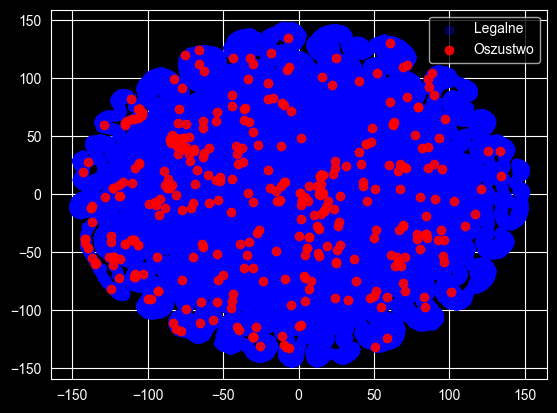

In [37]:
#Wizualizacja wynikow t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='coolwarm')
# plt.colorbar()
# plt.show()

plt.scatter(X_tsne[y_train==0, 0], X_tsne[y_train==0, 1], c='blue', label='Legalne', alpha=0.3)
plt.scatter(X_tsne[y_train==1, 0], X_tsne[y_train==1, 1], c='red', label='Oszustwo', alpha=0.9)
plt.legend()



In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_tensor = torch.FloatTensor(y_train.values).view(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).view(-1, 1)

X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


class ClassificationNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

model = ClassificationNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} completed")

# 4. Wyniki
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    y_pred = (predictions > 0.5).int().numpy()

print("\n--- WYNIKI SIECI NEURONOWEJ (PO PEŁNYM SKALOWANIU) ---")
print(classification_report(y_test.values, y_pred))

Epoch 10/50 completed
Epoch 20/50 completed
Epoch 30/50 completed
Epoch 40/50 completed
Epoch 50/50 completed

--- WYNIKI SIECI NEURONOWEJ (PO PEŁNYM SKALOWANIU) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.83      0.68        98

    accuracy                           1.00     56962
   macro avg       0.79      0.91      0.84     56962
weighted avg       1.00      1.00      1.00     56962

